# Análisis de datos en salud

Análisis de datos en salud
============================

Unidad 2 - Parte práctica I
-----------------------------------------------------

En esta sesión vamos a explorar el análisis de supervivencia para predecir la supervivencia de pacientes con cáncer de pulmón.

### Dataset

Los datos son parte del estudio descrito en el articulo siguiente:

`Loprinzi CL. Laurie JA. Wieand HS. Krook JE. Novotny PJ. Kugler JW. Bartel J. Law M. Bateman M. Klatt NE. et al. Prospective evaluation of prognostic variables from patient-completed questionnaires. North Central Cancer Treatment Group. Journal of Clinical Oncology. 12(3):601–7, 1994.`

**Descripción de los datos**

El dataset consta de 228 observaciones y 10 variables/columnas:

- inst: código de institución
- time (d1): tiempo de supervivencia en días
- status (d2): estado 1 = vivo, 2 = muerto
- age (i1): Edad en años
- sex (i2): Masculino = 1 Femenino = 2
- ph.ecog (i3): puntuación de rendimiento ECOG según la calificación del médico. 0 = asintomático, 1 = sintomático pero completamente ambulatorio, 2 = en cama menos de 50% del día, 3 = en cama más de 50% del día pero no encamado, 4 = encamado
- ph.karno (i4): puntuación de desempeño de Karnofsky (mala = 0; buena = 100) calificada por el médico
- pat.karno (i4): puntuación de rendimiento de Karnofsky según la calificación del paciente
- comida.cal (i5): Calorías consumidas en las comidas
- wt.loss (i6): Pérdida de peso en los últimos seis meses

Donde: 'i' indica las variables independientes (covariables) y 'd' indica las variables dependientes. En realidad, la variable dependiente o respuesta es el tiempo hasta que ocurre un evento (es decir, la muerte del paciente con cáncer de pulmón).

Una vez estamos familiarizados con las variables, vamos a cargar los datos.

In [1]:
# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Especificamos la ruta hasta la carpeta donde tenemos los archivos de la Unidad 2
%cd /content/drive/MyDrive/Colab_Notebooks/Analisis_datos_salud/Unidad2


Mounted at /content/drive
/content/drive/MyDrive/Colab_Notebooks/Analisis_datos_salud/Unidad2


In [2]:
# Cargamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargamos los datos
lung_df = pd.read_csv("data/lung_cancer.csv")

# Mostramos las primeras filas
lung_df.head(3)

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0


El estado (status) y el sexo son datos categóricos. El estado consta de 1: vivo y 2: muerto; mientras que el sexo consta de 1: Masculino y 2: Femenino. Se puede dejar así, pero es más común tener valores de 0 y 1. Por lo tanto, para establecer la etiqueta base en 0, necesitamos restar 1 de las variables.

In [3]:
# Seleccionamos las variables de interes
lung_df = lung_df[['time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno','pat.karno', 'meal.cal', 'wt.loss']]

# Modificamos la variable status
lung_df["status"] = lung_df["status"] - 1

# Modificamos la variable sex
lung_df["sex"] = lung_df["sex"] - 1

# Mostramos las primeras filas
lung_df.head(3)

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,306,1,74,0,1.0,90.0,100.0,1175.0,NaN
1,455,1,68,0,0.0,90.0,90.0,1225.0,15.0
2,1010,0,56,0,0.0,90.0,90.0,NaN,15.0


In [4]:
# Miramos el tipo de las variables
lung_df.dtypes

,0
time,int64
status,int64
age,int64
sex,int64
ph.ecog,float64
ph.karno,float64
pat.karno,float64
meal.cal,float64
wt.loss,float64


In [5]:
# Podemos ver algunos NaNs en los datos
lung_df.isnull().sum()

,0
time,0
status,0
age,0
sex,0
ph.ecog,1
ph.karno,1
pat.karno,3
meal.cal,47
wt.loss,14


In [6]:
# Tratamos los valores nulos
# Sustituímos por mediana o valor más frecuente
lung_df["ph.karno"].fillna(lung_df["ph.karno"].mean(), inplace = True)
lung_df["pat.karno"].fillna(lung_df["pat.karno"].mean(), inplace = True)
lung_df["meal.cal"].fillna(lung_df["meal.cal"].mean(), inplace = True)
lung_df["wt.loss"].fillna(lung_df["wt.loss"].mean(), inplace = True)
lung_df["ph.ecog"].fillna(lung_df["ph.ecog"].mode()[0], inplace = True)

<ipython-input-6-c1fa9b939c15>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lung_df["ph.karno"].fillna(lung_df["ph.karno"].mean(), inplace = True)
<ipython-input-6-c1fa9b939c15>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [7]:
# Podemos ver que ya no hay NaNs
lung_df.isnull().sum()

,0
time,0
status,0
age,0
sex,0
ph.ecog,0
ph.karno,0
pat.karno,0
meal.cal,0
wt.loss,0


#### Distribución de los datos

Primero, guardamos la variable de tiempo en `T` y la variable de evento/estado en `E`, ya que las usaremos durante el proceso de ajuste del modelo.

A continuación, creamos un histograma de la variable de tiempo para obtener una idea general de la distribución. El histograma muestra que la variable de tiempo casi sigue una distribución Weibull o Log-normal.

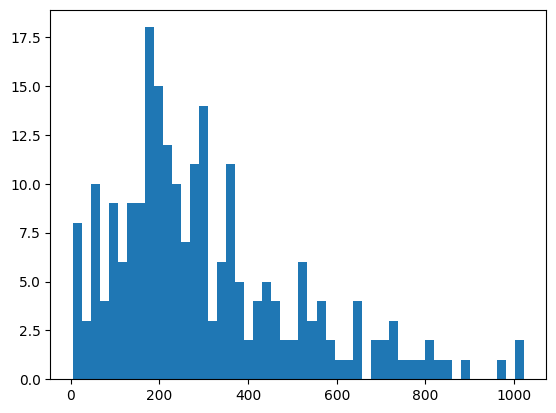

In [8]:
# Guardamos las variables de tiempo y estado
T = lung_df["time"]
E = lung_df["status"]

# Mostramos el histograma del tiempo
plt.hist(T, bins = 50)
plt.show()

#### Estimación de la curva Kaplan-Maier

Para empezar con el análisis de supervivencia, el primer paso es definir una curva de supervivencia. Comúnmente se usa la curva de Kaplan-Maier.

La curva ilustra cómo cambian las probabilidades de supervivencia a lo largo del horizonte temporal. A medida que pasa el tiempo, las probabilidades de supervivencia de los pacientes con cáncer de pulmón se reducen.



  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=9782bf04f765551ededf848e3e33fc3351d727751153ac0d72b1d89fa21bacfb
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


<Axes: xlabel='timeline'>

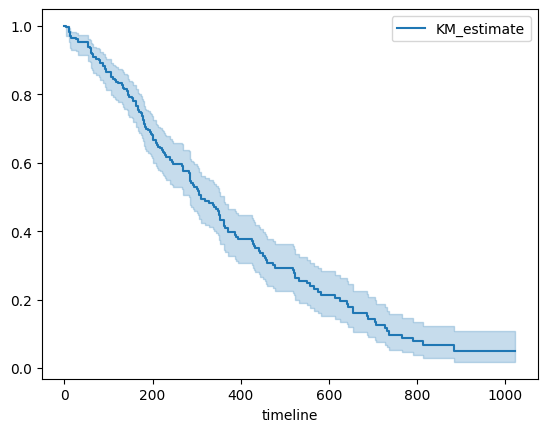

In [9]:
# Instalamos la librería lifelines (solo la 1a vez)
!pip install lifelines

# Cargamos la función KaplanMeierFitter
from lifelines import KaplanMeierFitter

# Inicializamos la función
kmf = KaplanMeierFitter()
# Estimamos la función con nuestros datos
kmf.fit(durations = T, event_observed = E)

# Mostramos la curva de supervivencia
kmf.plot_survival_function()

# La area azul representa el intervalo de confianza del 95%

Text(0.5, 1.0, 'Survival function')

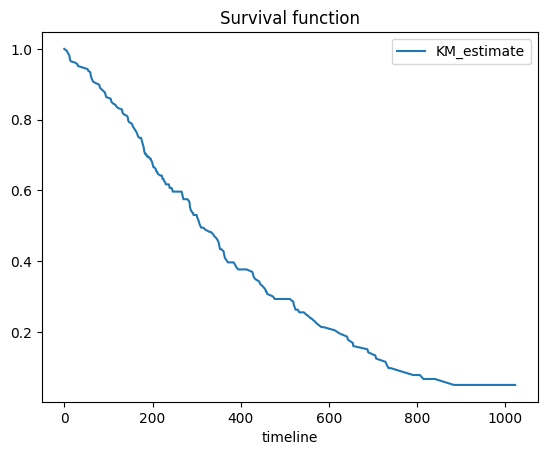

In [10]:
# Sin el intervalo de confianza
kmf.survival_function_.plot()
plt.title('Survival function')

<Axes: xlabel='timeline'>

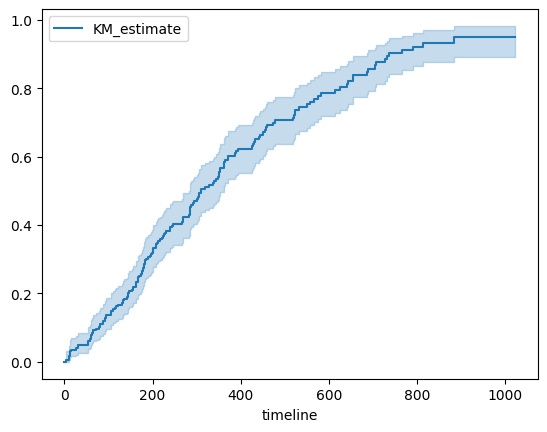

In [11]:
# La curva opuesta
# Probabilidad del evento (muerte) en función del tiempo
kmf.plot_cumulative_density()

#### Tiempo medio de supervivencia e intervalos de confianza

El siguiente paso es estimar la mediana del tiempo de supervivencia y los intervalos de confianza del 95%. Esto se puede hacer usando las funciones median_survival_time_ y median_survival_times().

Aquí, el tiempo medio de supervivencia es de 310 días, lo que indica que el 50% de la muestra vive 310 días y el 50% muere dentro de este tiempo. El límite inferior del IC del 95% es 284 días, mientras que el límite superior es 361 días.

In [12]:
# Cargamos las funciones necesarias
from lifelines.utils import median_survival_times

# Calculamos el tiempo medio de supervivencia
# y los intervalos de confianza
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

print("Tiempo medio de supervivencia (50%):", median_)
print("Intervalos de confianza:\n", median_confidence_interval_)

Tiempo medio de supervivencia (50%): 310.0
Intervalos de confianza:
      KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                   284.0                   361.0


Utilizando la estimación de KM, podemos comprobar la diferencia entre grupos categóricos. Sin embargo, sólo es viable cuando la variable tiene pocas categorías. A continuación se muestra un ejemplo en el que dibujamos las dos curvas de supervivencia, una para hombres y otra para mujeres.

Text(0.5, 1.0, 'Supervivencia por género')

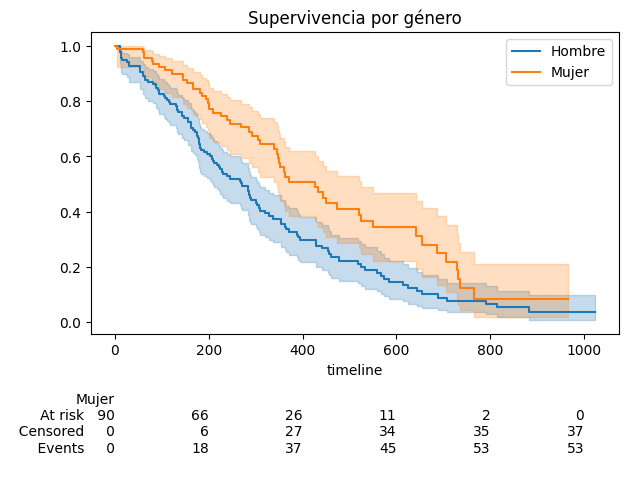

In [13]:
# Creamos el gráfico
ax = plt.subplot(111)

# Seleccionamos los hombres
m = (lung_df["sex"] == 0)
# Calculamos la curva de supervivencia para los hombres
kmf.fit(durations = T[m], event_observed = E[m], label = "Hombre")
# Creamos el gráfico de la curva de supervivencia
kmf.plot_survival_function(ax = ax)

# Repetimos el fit solo con las mujeres
kmf.fit(T[~m], event_observed = E[~m], label = "Mujer")
# Creamos el gráfico de la curva de supervivencia
kmf.plot_survival_function(ax = ax, at_risk_counts = True)

plt.title("Supervivencia por género")


De manera similar al género, también podemos trazar curvas de supervivencia separadas para otras variables categóricas. Aquí, usamos un bucle for que itera sobre todas las categorías de ph.ecog y traza su función de supervivencia en un solo gráfico.

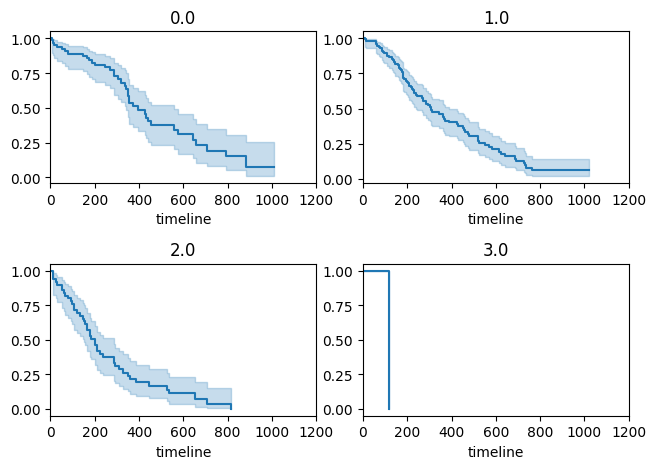

In [14]:
# Nos quedamos con los tipos de ecog
ecog_types = lung_df.sort_values(by = ['ph.ecog'])["ph.ecog"].unique()

# Recorremos cada tipo y repetimos el análisis anterior por categoría
for i, ecog_types in enumerate(ecog_types):
  ax = plt.subplot(2, 2, i + 1)
  ix = lung_df['ph.ecog'] == ecog_types
  kmf.fit(T[ix], E[ix], label = ecog_types)
  kmf.plot_survival_function(ax = ax, legend = False)
  plt.title(ecog_types)
  plt.xlim(0, 1200)
plt.tight_layout()

In [15]:
# Podemos ver que ph.ecog = 3 solo tiene 1 muestra
lung_df['ph.ecog'].value_counts()

,count
ph.ecog,
1.0,114
0.0,63
2.0,50
3.0,1


In [16]:
# Eliminamos esa muestra
lung_df = lung_df[lung_df["ph.ecog"] != 3]
lung_df.shape

(227, 9)

#### Modelo de Cox Proportional Hazard

El modelo Cox-PH es un modelo semiparamétrico que resuelve el problema de incorporar covariables. En el modelo de riesgo proporcional de Cox, el riesgo logarítmico es una función lineal de las covariables y un riesgo de referencia a nivel de población.

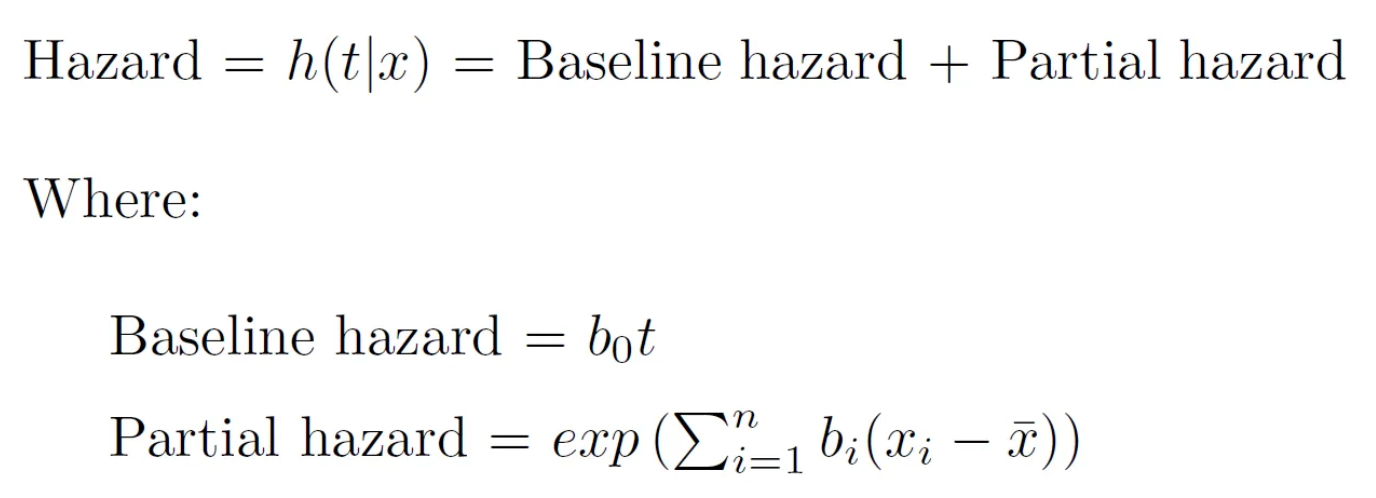

In [17]:
from IPython import display
display.Image("img/Cox-PH.png", width=500)

En la ecuación anterior, el primer término es el riesgo base (*hazard*) y el segundo término se conoce como riesgo parcial. El riesgo parcial aumenta o desinfla el riesgo de referencia en función de las covariables.

El riesgo se define como la pendiente de la curva de supervivencia. Es una medida de la rapidez con la que mueren los sujetos.
El índice de riesgo compara dos grupos. Si el índice de riesgo es 2, entonces la tasa de muertes en un grupo es el doble que la tasa en el otro grupo.

Para ajustar el modelo Cox-PH, necesitamos realizar un preprocesamiento de las variables categóricas.

In [18]:
# Vamos a transformar ph.ecog en número entero
lung_df["ph.ecog"] = lung_df["ph.ecog"].astype(int)

# Usamos get_dummies para crear una columna binaria por cada categoría
dummies_ecog = pd.get_dummies(lung_df["ph.ecog"], prefix = 'ecog')

# Seleccionamos las 2 de las 3 columnas
# ya que la 3a se puede representar con las otras dos
dummies_ecog = dummies_ecog[["ecog_1", "ecog_2"]]

# Concatenamos los datos
lung_df = pd.concat([lung_df, dummies_ecog], axis = 1)
lung_df = lung_df.drop("ph.ecog", axis = 1)
lung_df.head(3)

,time,status,age,sex,ph.karno,pat.karno,meal.cal,wt.loss,ecog_1,ecog_2
0,306,1,74,0,90.0,100.0,1175.000000,9.831776,True,False
1,455,1,68,0,90.0,90.0,1225.000000,15.000000,False,False
2,1010,0,56,0,90.0,90.0,928.779006,15.000000,False,False


In [19]:
# Ahora vamos a aplicar el modelo Cox-PH

# Cargamos la función CoxPHFitter
from lifelines import CoxPHFitter
cph = CoxPHFitter()

# Hacemos el fit con nuestros datos
cph.fit(lung_df, duration_col = 'time', event_col = 'status')

# Mostramos la tabla resumen de resultados
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 227 total observations, 63 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 227
number of events observed = 164
   partial log-likelihood = -726.70
         time fit was run = 2025-03-29 10:43:42 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.01      1.01      0.01           -0.01            0.03                0.99                1.03
sex       -0.58      0.56      0.17           -0.92           -0.25                0.40                0.78
ph.karno   0.01      1.01      0.01           -0.00            0.03                1.00                1.03
pat.karno -0.01      0.99      0.01           -0.03            0.00                0.97                1.00
meal.cal   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
wt.loss   -0.01      0.99      0.01           -0.02            0.00                0.98                1.00
ecog_1     0.60      1.83      0.24            0.14            1.07                1.15                2.91
ecog_2     1.13      3.10      0.37            0.40            1.86                1.49                6.44

           cmp to     z      p  -log2(p)
covariate                               
age          0.00  1.29   0.20      2.35
sex          0.00 -3.43 <0.005     10.67
ph.karno     0.00  1.46   0.14      2.79
pat.karno    0.00 -1.80   0.07      3.80
meal.cal     0.00  0.12   0.91      0.14
wt.loss      0.00 -1.61   0.11      3.22
ecog_1       0.00  2.53   0.01      6.45
ecog_2       0.00  3.03 <0.005      8.70
---
Concordance = 0.65
Partial AIC = 1469.40
log-likelihood ratio test = 35.58 on 8 df
-log2(p) of ll-ratio test = 15.54

Vamos a interpretar los resultados:

Wt.loss tiene un coeficiente de aproximadamente -0.01. En el modelo proporcional de Cox, un riesgo más alto significa mayor riesgo de que ocurra el evento. Aquí, el valor de exp(-0.01) se denomina *hazard ratio*.
Indica que un aumento de una unidad de wt.loss significa que el *baseline hazard* augmentará en un factor de exp(-0.01) = 0.99, es decir, alrededor de 1%.

De manera similar, los valores en la columna ph.ecog son:

`0 = asintomático, 1 = sintomático pero completamente ambulatorio y 2 = en cama <50% del día`.

El valor del coeficiente asociado con ecog2, exp(1.13), es el valor de riesgo (*hazard ratio*) asociado con estar en cama 50% del día. Esto indica que el riesgo (tasa) de fallecimiento es 3.1 veces mayor para estos pacientes que los pacientes asintomáticos.

También podemos mostrar el ranking de variables según el logaritmo del *hazard ratio* (log(HR)).

<Axes: xlabel='log(HR) (95% CI)'>

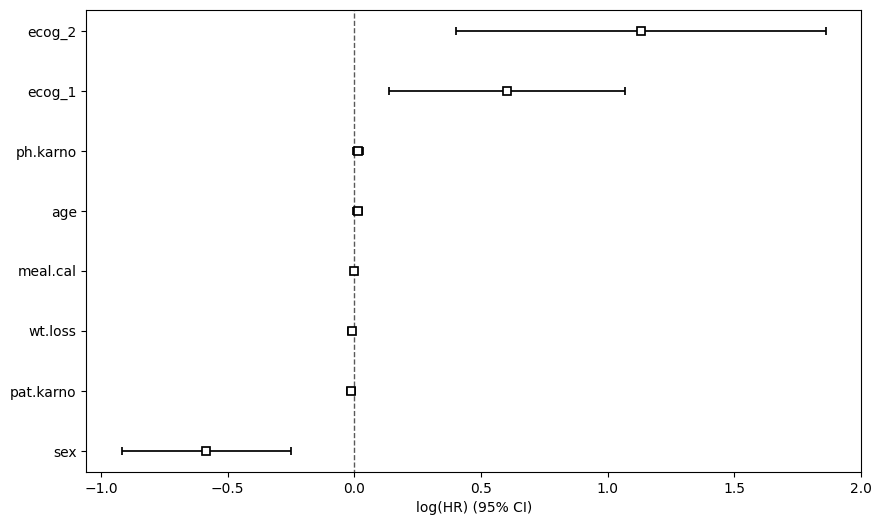

In [20]:
plt.subplots(figsize = (10, 6))
cph.plot()

Por otro lado, podemos usar el modelo ajustado para ver cómo cambia la supervivencia a medida que cambiamos los valores de las covariables.

Aquí, usamos el método plot_partial_effects_on_outcome() para ver cómo varía la supervivencia para los grupos de edad de 50, 60, 70 y 80 años en comparación con su función de referencia. Destaca claramente que los pacientes jóvenes tienen mayores probabilidades de supervivencia en un momento dado en comparación con los pacientes mayores.

<Axes: >

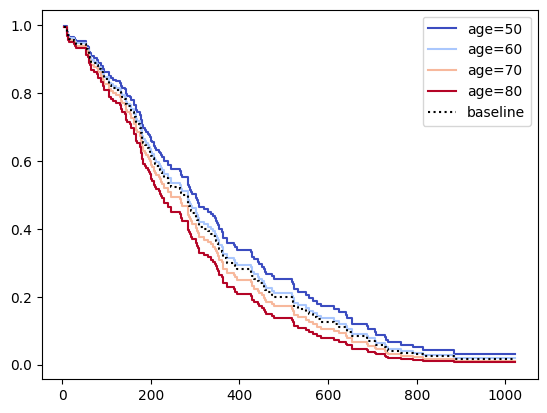

In [21]:
cph.plot_partial_effects_on_outcome(covariates = 'age', values = [50, 60, 70, 80], cmap = 'coolwarm')

Una vez se ha estimado el modelo, se tiene que comprobar si se cumple la condición de riesgo proporcional (*Proportional Hazard*). En este test, la hipótesis nula (H0) asume que la condición se cumple, mientras que la alternativa (H1) indica que no se respeta.



In [22]:
cph.check_assumptions(lung_df, p_value_threshold = 0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 227 total observations, 63 right-censored observations>
         test_name = proportional_hazard_test

---
                test_statistic    p  -log2(p)
age       km              0.45 0.50      0.99
          rank            0.21 0.65      0.62
ecog_1    km              1.80 0.18      2.48
          rank            1.65 0.20      2.33
ecog_2    km              1.63 0.20      2.31
          rank            1.27 0.26      1.94
meal.cal  km              5.00 0.03      5.30
          rank            4.40 0.04      4.80
pat.karno km              0.24 0.63      0.68
          rank            0.19 0.67      0.58
ph.karno  km              4.59 0.03      4.96
          rank            4.01 0.05      4.47
sex       km              2.64 0.10      3.27
          rank            2.53 0.11      3.16
wt.loss   km              0.00 0.99      0.02
          rank            0.01 0.94      0.09



1. Variable 'ph.karno' failed the non-proportional test: p-value is 0.0322.

   Advice 1: the functional form of the variable 'ph.karno' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'ph.karno' using pd.cut, and then specify it in
`strata=['ph.karno', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'meal.cal' failed the non-proportional test: p-value is 0.0253.

   Advice 1: the functional form of the variable 'meal.cal' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional

[]

En este caso, las variables de ph.karno y meal.cal no cumplen la condición. Para tratar este problema, se puede usar un modelo de Cox-PH paramétrico.

In [23]:
# Cargamos la función necesaria
from lifelines.statistics import proportional_hazard_test
results = proportional_hazard_test(cph, lung_df, time_transform='rank')

# Mostramos los resultados
results.print_summary(decimals=3, model="untransformed variables")

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 227 total observations, 63 right-censored observations>
         test_name = proportional_hazard_test

---
           test_statistic    p  -log2(p)
age                  0.21 0.65      0.62
ecog_1               1.65 0.20      2.33
ecog_2               1.27 0.26      1.94
meal.cal             4.40 0.04      4.80
pat.karno            0.19 0.67      0.58
ph.karno             4.01 0.05      4.47
sex                  2.53 0.11      3.16
wt.loss              0.01 0.94      0.09

Aún usando el modelo paramétrico, la variable meal.cal sigue no cumpliendo el criterio del modelo de Cox-PH. En estas situaciones, es mejor usar otro modelo, como el AFT (Accelerated Failure Time), que asume que la función de supervivencia sigue una distribución paramétrica.

En base a las covariables, el modelo AFT puede acelerar o desacelerar los tiempos hasta el evento. Los coeficientes del modelo AFT se pueden interpretar fácilmente: un aumento unitario en una covariable significa que el tiempo de supervivencia promedio/mediano cambia por un factor de exp(coeficiente).

Hay distintas distribuciones que se pueden usar, como la Weibull, la exponencial, la log-normal, etc. En este ejemplo, vamos a usar la Weibull.

In [24]:
# Cargamos la función necesaria
from lifelines import WeibullAFTFitter
weibull_aft = WeibullAFTFitter()

# Aplicamos la función de AFT a nuestros datos
weibull_aft.fit(lung_df, duration_col='time', event_col='status')

# Mostramos los resultados
weibull_aft.print_summary(3)

<lifelines.WeibullAFTFitter: fitted with 227 total observations, 63 right-censored observations>
             duration col = 'time'
                event col = 'status'
   number of observations = 227
number of events observed = 164
           log-likelihood = -1129.680
         time fit was run = 2025-03-29 10:43:43 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                   
lambda_ age       -0.008     0.992     0.007          -0.022           0.005               0.979               1.005
        ecog_1    -0.435     0.647     0.168          -0.764          -0.106               0.466               0.900
        ecog_2    -0.838     0.433     0.263          -1.353          -0.323               0.258               0.724
        meal.cal  -0.000     1.000     0.000          -0.000           0.000               1.000               1.000
        pat.karno  0.009     1.009     0.005          -0.001           0.019               0.999               1.020
        ph.karno  -0.011     0.989     0.007          -0.024           0.002               0.976               1.002
        sex        0.420     1.523     0.123           0.179           0.662               1.195               1.939
        wt.loss    0.007     1.008     0.005          -0.002           0.017               0.998               1.017
        Intercept  6.870   962.513     0.887           5.130           8.609             169.050            5480.209
rho_    Intercept  0.332     1.393     0.062           0.210           0.453               1.234               1.573

                   cmp to      z       p  -log2(p)
param   covariate                                 
lambda_ age         0.000 -1.224   0.221     2.177
        ecog_1      0.000 -2.590   0.010     6.702
        ecog_2      0.000 -3.188   0.001     9.446
        meal.cal    0.000 -0.037   0.970     0.044
        pat.karno   0.000  1.821   0.069     3.867
        ph.karno    0.000 -1.652   0.098     3.344
        sex         0.000  3.406   0.001    10.569
        wt.loss     0.000  1.596   0.110     3.179
        Intercept   0.000  7.741 <0.0005    46.525
rho_    Intercept   0.000  5.352 <0.0005    23.458
---
Concordance = 0.647
AIC = 2279.359
log-likelihood ratio test = 35.640 on 8 df
-log2(p) of ll-ratio test = 15.578

Un aumento unitario en la covariable indica que el tiempo de supervivencia medio/mediano cambiará en un factor de exp(coeficiente).

Si el coeficiente es positivo, entonces la exp(coeficiente) será >1, lo que desacelerará el tiempo del incidente/evento. De manera similar, un coeficiente negativo reducirá el tiempo de supervivencia medio/mediano.

El sexo, que contiene `0: Masculino y 1: Femenino`, tiene un coeficiente positivo.
Esto significa que ser una mujer en comparación con un hombre cambia el tiempo de supervivencia medio en exp(0.42) = 1.523, aproximadamente un aumento del 52 % en el tiempo de supervivencia medio.

En cambio, la variable ecog=2 tiene coeficiente negativo, lo que significa que estos pacientes tienen un disminución de supervivencia de exp(-0.838) = 0.433.

Por otro lado, con este modelo también se pueden mostrar los valores medios de supervivencia y los gráficos de importancia y de diferencia de curvas según una categoría:

In [25]:
# Calculamos el tiempo de supervivencia media
print("Media de supervivencia:", weibull_aft.mean_survival_time_)

Media de supervivencia: 314.61879615153566


<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

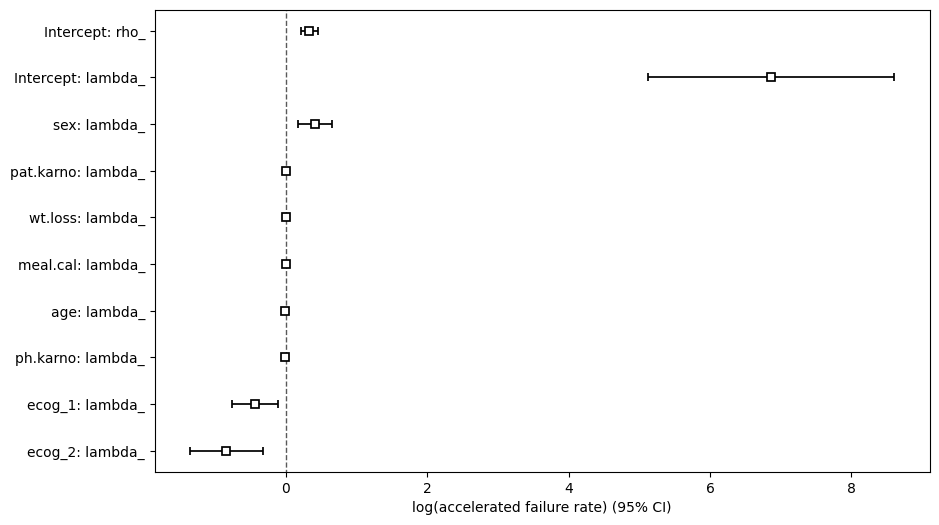

In [26]:
# Mostramos el ranking de variables según log(AFR)
plt.subplots(figsize=(10, 6))
weibull_aft.plot()

<Axes: >

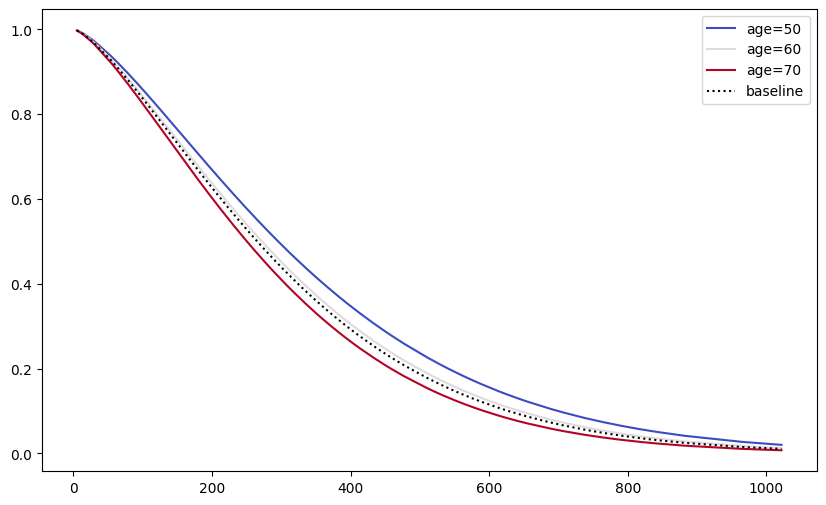

In [27]:
plt.subplots(figsize=(10, 6))
weibull_aft.plot_partial_effects_on_outcome('age', range(50, 80, 10), cmap='coolwarm')